Our first figure will be a demonstration of how basin volume esimtation works. We'll display a shape along with an arbitrary point inside of it, and draw random vectors for the perturbations along with explicit shapes for the volumes that get estimated.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import Polygon

# --- Function for finding intersection ---
def find_boundary_intersection(start_point, direction, boundary_x, boundary_y, gap=0.0):
    path = Path(np.column_stack((boundary_x, boundary_y)))
    step = 0.001
    distance = 0
    max_distance = 10
    while distance < max_distance:
        test_point = [
            start_point[0] + distance * direction[0],
            start_point[1] + distance * direction[1]
        ]
        if not path.contains_point(test_point):
            return [
                start_point[0] + (distance - gap) * direction[0],
                start_point[1] + (distance - gap) * direction[1]
            ]
        distance += step
    return [
        start_point[0] + (max_distance - gap) * direction[0],
        start_point[1] + (max_distance - gap) * direction[1]
    ]

# --- Define L-shaped polygon ---
boundary_x = np.array([0, 1.7, 1.7, 1.4, 1.4, 0, 0])
boundary_y = np.array([0, 0, 1.5, 1.5, 1, 1, 0])

# Pick a point inside the shape (manually)
center = [0.7, 0.5]

# --- Generate directions ---
# Low-resolution (12 evenly spaced directions, like clock hours)
low_res_angles = np.linspace(0, 2*np.pi, 12, endpoint=False)
low_res_dirs = np.column_stack([np.cos(low_res_angles), np.sin(low_res_angles)])

# High-resolution (e.g. 360 evenly spaced directions)
high_res_angles = np.linspace(0, 2*np.pi, 360, endpoint=False)
high_res_dirs = np.column_stack([np.cos(high_res_angles), np.sin(high_res_angles)])

# --- Find endpoints for both sets ---
low_res_endpoints = np.array([
    find_boundary_intersection(center, d, boundary_x, boundary_y) for d in low_res_dirs
])

high_res_endpoints = np.array([
    find_boundary_intersection(center, d, boundary_x, boundary_y) for d in high_res_dirs
])

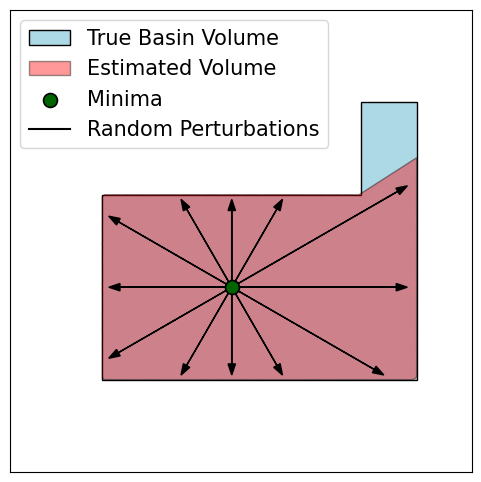

In [2]:
# --- Plotting ---
fig, ax = plt.subplots(figsize=(6, 6))

# Plot the original L-shape (true shape)
polygon = Polygon(
    np.column_stack((boundary_x, boundary_y)), 
    closed=True,
    facecolor='lightblue',
    edgecolor='k',
    label="True Basin Volume"
)
ax.add_patch(polygon)

# Create a patch for the estimated shape using high-res endpoints
estimated_polygon = Polygon(
    high_res_endpoints,
    closed=True,
    facecolor='red',   # estimated volume color
    edgecolor='black',
    alpha=0.4,
    label="Estimated Volume"
)
ax.add_patch(estimated_polygon)

# Plot the center point
ax.scatter(center[0], center[1],
           s=100,                  # size
           facecolor="darkgreen", # muted green fill
           edgecolor="black",     # black border
           linewidths=1.2,
           zorder=5,
           label="Minima")

# Plot arrows for low-res directions (scaled slightly shorter)
for endpoint in low_res_endpoints:
    ax.arrow(center[0], center[1],
             (endpoint[0] - center[0]) * 0.95,
             (endpoint[1] - center[1]) * 0.95,
             head_width=0.04, length_includes_head=True,
             color='black')

# Add a dummy line for arrow legend entry
ax.plot([], [], color='black', label="Random Perturbations")

# Clean up axes
ax.set_xlim(-0.5, 2)
ax.set_ylim(-0.5, 2)
ax.set_aspect('equal', adjustable='box')
ax.set_xticks([])  # remove x-axis ticks
ax.set_yticks([])  # remove y-axis ticks

# Add legend and title
ax.legend(fontsize = 15)
#ax.set_title("Basin Volume Estimation Demonstration")
plt.savefig("figs/star_convex_volume.png")
plt.show()


For our second figure, we display two shapes and point out that due to the monte carlo nature, it's possible to confuse the smaller shape as larger in volume than the bigger shape.

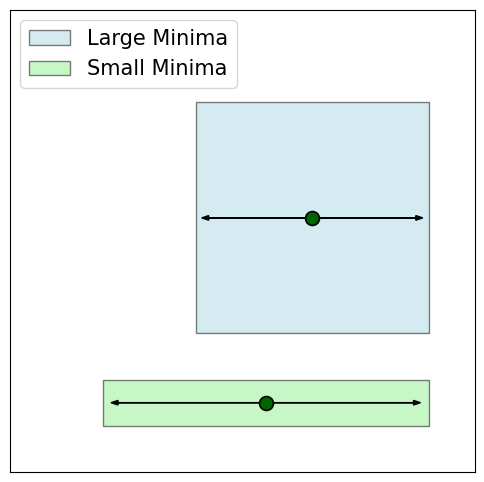

In [3]:
# --- User-specified directions (same for both shapes) ---
user_directions = np.array([
    [1, 0],   # right
    #[0, 1],   # up
    [-1, 0],  # left
    #[0, -1],  # down
    #[1, 1],   # diagonal up-right
    #[-1, 1]   # diagonal up-left
])

# --- Define shapes ---
shapes = {
    "Large Minima": {
        "boundary_x": np.array([1.5, 4, 4, 1.5, 1.5]),
        "boundary_y": np.array([1, 1, 3.5, 3.5, 1]),
        "center": [2.75, 2.25]
    },
    "Small Minima": {
        "boundary_x": np.array([0.5, 4, 4, 0.5, 0.5]),
        "boundary_y": np.array([0, 0, 0.5, 0.5, 0]),
        "center": [2.25, 0.25]
    }
}

# --- Plotting ---
fig, ax = plt.subplots(figsize=(6, 6))  # square figure
colors = ["lightblue", "lightgreen"]

for i, (name, shape) in enumerate(shapes.items()):
    boundary_x = shape["boundary_x"]
    boundary_y = shape["boundary_y"]
    center = shape["center"]

    # Plot the shape
    polygon = Polygon(
        np.column_stack((boundary_x, boundary_y)),
        closed=True,
        facecolor=colors[i % len(colors)],
        edgecolor='k',
        alpha=0.5,
        label=name
    )
    ax.add_patch(polygon)

    # Plot arrows using user-specified directions
    for d in user_directions:
        endpoint = find_boundary_intersection(center, d, boundary_x, boundary_y)
        ax.arrow(center[0], center[1],
                 (endpoint[0] - center[0]) * 0.95,
                 (endpoint[1] - center[1]) * 0.95,
                 head_width=0.05, length_includes_head=True,
                 color='black')

    # Plot center point
    ax.scatter(center[0], center[1],
               s=100,                  # size
               facecolor="darkgreen", # muted green fill
               edgecolor="black",     # black border
               linewidths=1.2,
               zorder=5,)
               #label="Minima")

# --- Axes settings ---
ax.set_xlim(-0.5, 4.5)
ax.set_ylim(-0.5, 4.5)
ax.set_xticks([])
ax.set_yticks([])
ax.legend(fontsize=15, loc='upper left')  # top-left legend

plt.savefig("figs/monte_carlo_width.png")
plt.show()

Next, we plot the potential effects of scale invariance. Scale invariance ensures minima are effectively infinite, and also allows us to slide around the effectively same minima. We show this in a pair of plots.

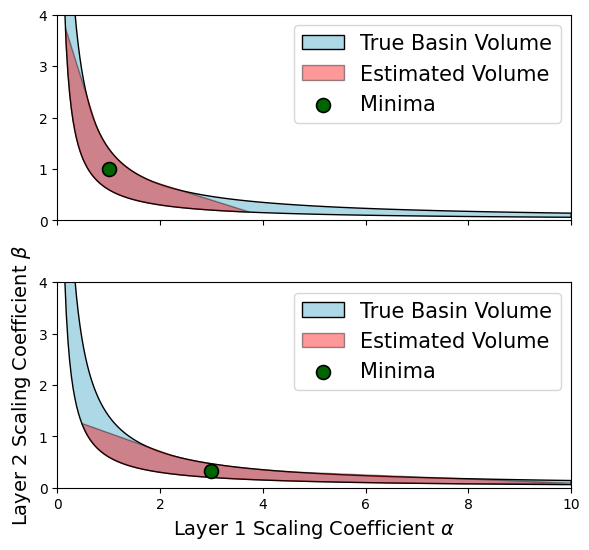

In [4]:
# --- Generate star-convex shape ---
a = 0.4  # adjust to change "thickness" of region
x_vals_top = np.linspace(0.01, 10, 300)
x_vals_bottom = np.linspace(10, 0.01, 300)

y_top = (1 + a) / x_vals_top
y_bottom = (1 - a) / x_vals_bottom

boundary_x = np.concatenate([x_vals_top, x_vals_bottom])
boundary_y = np.concatenate([y_top, y_bottom])

# --- Two different midpoints to compare ---
midpoints = [
    [1.0, 1/1.0],   # first center
    [3.0, 1/3.0]    # second center
]

# --- Generate high-resolution directions ---
high_res_angles = np.linspace(0, 2*np.pi, 360, endpoint=False)
high_res_dirs = np.column_stack([np.cos(high_res_angles), np.sin(high_res_angles)])

# --- Plotting (two vertically stacked subplots) ---
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6, 6), sharex=True)

for ax, center in zip(axes, midpoints):
    # Compute endpoints for this center
    high_res_endpoints = np.array([
        find_boundary_intersection(center, d, boundary_x, boundary_y) for d in high_res_dirs
    ])

    # Plot the original shape
    polygon = Polygon(
        np.column_stack((boundary_x, boundary_y)), 
        closed=True,
        facecolor='lightblue',
        edgecolor='k',
        label="True Basin Volume"
    )
    ax.add_patch(polygon)

    # Plot the estimated shape using high-res endpoints
    estimated_polygon = Polygon(
        high_res_endpoints,
        closed=True,
        facecolor='red',
        edgecolor='black',
        alpha=0.4,
        label="Estimated Volume"
    )
    ax.add_patch(estimated_polygon)

    # Plot the center point
    ax.scatter(center[0], center[1],
               s=100,                  # size
               facecolor="darkgreen", # muted green fill
               edgecolor="black",     # black border
               linewidths=1.2,
               zorder=5,
               label="Minima")

    # Formatting
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 4)
    ax.set_aspect('equal', adjustable='box')
    ax.legend(fontsize=15, loc="upper right")

# Add axis labels (only to outer axes so they are not repeated)
axes[-1].set_xlabel(r"Layer 1 Scaling Coefficient $\alpha$", fontsize=14)
axes[len(axes)//2].set_ylabel(r"Layer 2 Scaling Coefficient $\beta$", fontsize=14)

plt.tight_layout()
plt.savefig("figs/scale_invariance.png")
plt.show()


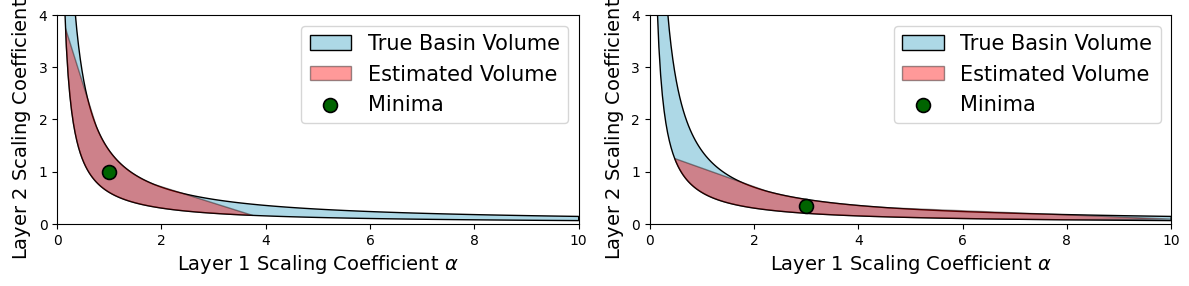

In [5]:
# --- Plotting (two vertically stacked subplots) ---
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8), sharex=True)

for ax, center in zip(axes, midpoints):
    # Compute endpoints for this center
    high_res_endpoints = np.array([
        find_boundary_intersection(center, d, boundary_x, boundary_y) for d in high_res_dirs
    ])

    # Plot the original shape
    polygon = Polygon(
        np.column_stack((boundary_x, boundary_y)), 
        closed=True,
        facecolor='lightblue',
        edgecolor='k',
        label="True Basin Volume"
    )
    ax.add_patch(polygon)

    # Plot the estimated shape using high-res endpoints
    estimated_polygon = Polygon(
        high_res_endpoints,
        closed=True,
        facecolor='red',
        edgecolor='black',
        alpha=0.4,
        label="Estimated Volume"
    )
    ax.add_patch(estimated_polygon)

    # Plot the center point
    # Plot the center point
    ax.scatter(center[0], center[1],
               s=100,                  # size
               facecolor="darkgreen", # muted green fill
               edgecolor="black",     # black border
               linewidths=1.2,
               zorder=5,
               label="Minima")

    # Formatting
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 4)
    ax.set_aspect('equal', adjustable='box')
    ax.legend(fontsize=15, loc="upper right")

    # Add axis labels on **each** subplot
    ax.set_xlabel(r"Layer 1 Scaling Coefficient $\alpha$", fontsize=14)
    ax.set_ylabel(r"Layer 2 Scaling Coefficient $\beta$", fontsize=14)

plt.tight_layout()
plt.savefig("figs/scale_invariance_horizontal.png", bbox_inches='tight')
plt.show()
